In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainin/finalTrain.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from math import radians,sin, cos, sqrt,atan2
import warnings
import folium

warnings.filterwarnings("ignore")


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r"/kaggle/input/trainin/finalTrain.csv")

In [4]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
df.shape

(45584, 20)

In [6]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [8]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [9]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [10]:
for i in df.columns:
    print(f"no. of unique values in {i} is : {df[i].nunique()}")
    print("####################################################")
    if (df[i].nunique()) < 8:
        print(f"  unique value are : {df[i].unique()}")
        print("***************************************")
    else:
        pass

no. of unique values in ID is : 45584
####################################################
no. of unique values in Delivery_person_ID is : 1320
####################################################
no. of unique values in Delivery_person_Age is : 22
####################################################
no. of unique values in Delivery_person_Ratings is : 28
####################################################
no. of unique values in Restaurant_latitude is : 657
####################################################
no. of unique values in Restaurant_longitude is : 518
####################################################
no. of unique values in Delivery_location_latitude is : 4373
####################################################
no. of unique values in Delivery_location_longitude is : 4373
####################################################
no. of unique values in Order_Date is : 44
####################################################
no. of unique values in Time_Orderd is : 176
######

In [11]:
feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage = []

for column in df.columns:
    feature.append(column)
    count.append(len(df[column]))
    missing.append(df[column].isnull().sum())
    unique.append(df[column].nunique())
    missing_percentage.append((df[column].isnull().sum()/df.shape[0])*100)
    dtypes.append(df[column].dtypes)
    
dataframe = pd.DataFrame({'feature': feature, 'count': count, 'missing': missing, 'nunique': unique, 'missing_percentage': missing_percentage, 'd_types':dtypes})


dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,d_types
feature,,,,,
ID,45584,0,45584,0.000000,object
Delivery_person_ID,45584,0,1320,0.000000,object
Delivery_person_Age,45584,1854,22,4.067217,float64
Delivery_person_Ratings,45584,1908,28,4.185679,float64
Restaurant_latitude,45584,0,657,0.000000,float64
Restaurant_longitude,45584,0,518,0.000000,float64
Delivery_location_latitude,45584,0,4373,0.000000,float64
Delivery_location_longitude,45584,0,4373,0.000000,float64
Order_Date,45584,0,44,0.000000,object


In [12]:
df.drop('ID', axis = 1, inplace = True)

In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [14]:
df['Order_Date']

0       2022-12-02
1       2022-02-13
2       2022-04-03
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-11-03
45582   2022-07-03
45583   2022-02-03
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [15]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day

In [16]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,12,2
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,4,3
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [17]:
df.drop('Order_Date', axis = 1, inplace = True)

In [18]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [19]:
df.dropna(subset = ['Time_Orderd'], inplace =True)

In [20]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.', ':')

In [21]:
df['Time_Orderd'].sample(10)

18088          20:35
7141           21:20
5802           12:25
37585          18:50
31226          11:55
28645          22:15
21003    0:791666667
44289          18:25
25984    0:916666667
22575          19:40
Name: Time_Orderd, dtype: object

In [22]:
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'
    



df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43853 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           43853 non-null  object 
 1   Delivery_person_Age          43639 non-null  float64
 2   Delivery_person_Ratings      43585 non-null  float64
 3   Restaurant_latitude          43853 non-null  float64
 4   Restaurant_longitude         43853 non-null  float64
 5   Delivery_location_latitude   43853 non-null  float64
 6   Delivery_location_longitude  43853 non-null  float64
 7   Time_Orderd                  43853 non-null  object 
 8   Time_Order_picked            43853 non-null  object 
 9   Weather_conditions           43853 non-null  object 
 10  Road_traffic_density         43853 non-null  object 
 11  Vehicle_condition            43853 non-null  int64  
 12  Type_of_order                43853 non-null  object 
 13  Type_of_vehicle 

In [24]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format = '%H:%M:%S', errors='ignore')

In [25]:
df['TimeOrder_Hour'] = df['Time_Orderd'].str.split(':', expand = True)[0]
df['TimeOrder_Hour'] = df['TimeOrder_Hour'].replace('0', '00')

df['TimeOrder_Hour'] = df['TimeOrder_Hour'].astype('int32')

In [26]:
df['TimeOrder_min'] = df['Time_Orderd'].str.split(':', expand = True)[1]

df['TimeOrder_Hour'] = df['TimeOrder_Hour'].astype('int32')

In [27]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,12,2,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,4,3,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [28]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.', ':')

In [29]:
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'
    



df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [30]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format = '%H:%M:%S', errors='ignore')

In [31]:
df['Time_Order_picked_Hour'] = df['Time_Order_picked'].str.split(':', expand = True)[0]


df['Time_Order_picked_Hour'] = df['Time_Order_picked_Hour'].astype('int32')

In [32]:
df['Time_Order_picked_min'] = df['Time_Order_picked'].str.split(':', expand = True)[0]


df['Time_Order_picked_min'] = df['Time_Order_picked_min'].astype('int32')

In [33]:
df['Delivery_city'] = df['Delivery_person_ID'].str.split('RES', expand = True)[0]

In [34]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,12,2,21,55,22,22,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,15,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,Metropolitian,21,2022,4,3,17,30,17,17,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,Metropolitian,20,2022,2,13,9,20,9,9,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,Metropolitian,41,2022,2,14,19,50,20,20,KNP


In [35]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [36]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city'],
      dtype='object')

In [37]:
df['Restaurant_latitude'].dtypes

dtype('float64')

In [38]:
df['Delivery_person_Ratings'].isnull().sum()

268

In [39]:
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [40]:
df['Delivery_person_Ratings'].isnull().sum()

0

In [41]:
folium.Map(titles = 'cartodb positron')

In [42]:
import plotly.express as px
data1 = df.copy()
data1.dropna(axis = 0, how = 'any', subset = None, inplace = True)
color_scale = [(0, 'orange'), (1, 'red')]
fig = px.scatter_mapbox(data1, lat = 'Restaurant_latitude', lon = 'Restaurant_longitude', color_continuous_scale = color_scale, zoom = 8, height = 1000, width = 1000)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [43]:
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [44]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,12,2,21,55,22,22,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,15,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,Metropolitian,21,2022,4,3,17,30,17,17,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,Metropolitian,20,2022,2,13,9,20,9,9,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,Metropolitian,41,2022,2,14,19,50,20,20,KNP


In [45]:
import math

def distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    R = 6371.0
    
    dist = R * c
    
    return dist

# Assuming you have the DataFrame df with the latitude and longitude columns as mentioned in the previous code.

df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)


In [46]:
df['distance'].head()

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [47]:
df.groupby(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'])['distance']


In [48]:
df[(df['Restaurant_latitude']<8) & (df['Delivery_location_latitude']<8)].shape

(3509, 27)

In [49]:
df = df.drop(df[(df['Restaurant_latitude']< 8) & (df['Delivery_location_latitude']<8)].index)

In [50]:
df[(df['Restaurant_latitude']>37) & (df['Delivery_location_latitude']>37)].shape

(0, 27)

In [51]:
df[(df['Restaurant_longitude']<68) & (df['Delivery_location_longitude']<68)].shape

(0, 27)

In [52]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [53]:
min_distance = df.groupby('distance')[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']].min().sort_values(by = 'distance', ascending = True).head(1)
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [54]:
import folium
from branca.element import Figure
fig2 = Figure(width = 850, height = 550)

m = folium.Map(location = [30.914057, 75.83982], zoom_start =12)

folium.Marker(location = [30.914057, 75.83982], popup = 'Restaurant', icon = folium.Icon(color = 'purple', prefix = 'fa', icon = 'anchor')).add_to(m)

folium.Marker(location = [30.924057, 75.84982], popup = 'Delivery').add_to(m)

folium.PolyLine(locations = [[30.914057, 75.83982],[30.924057, 75.84982]], color = 'red').add_to(m)

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

In [55]:
max_distance = df.groupby('distance')[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']].max().sort_values(by = 'distance', ascending = True).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [56]:
tooltips = f" Distance: {df['distance'].max()} km"

In [57]:
import folium
from branca.element import Figure
fig2 = Figure(width = 850, height = 550)

m = folium.Map(location = [25.443994, 81.860187], zoom_start =12)

folium.Marker(location = [25.443994, 81.860187], popup = 'Restaurant', icon = folium.Icon(color = 'purple', prefix = 'fa', icon = 'anchor')).add_to(m)

folium.Marker(location = [25.583994, 82.000187], popup = 'Delivery').add_to(m)

folium.PolyLine(locations = [[25.443994, 81.860187],[25.583994, 82.000187]], color = 'red').add_to(m)

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

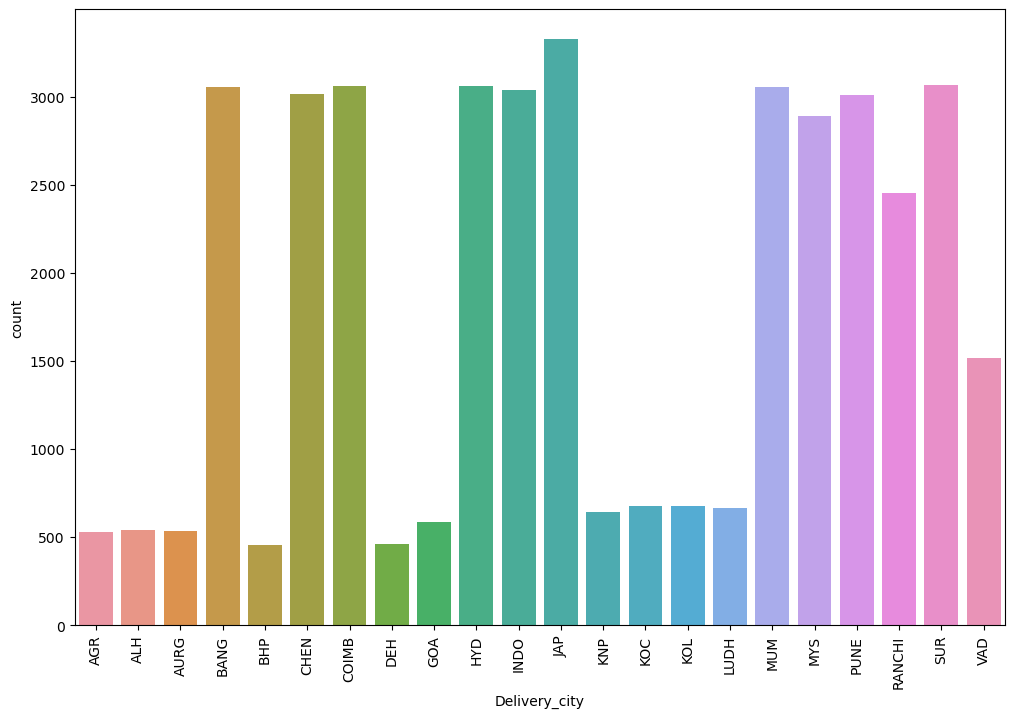

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Delivery_city' column to categorical
df['Delivery_city'] = df['Delivery_city'].astype('category')

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Delivery_city')
plt.xticks(rotation='vertical')
plt.show()


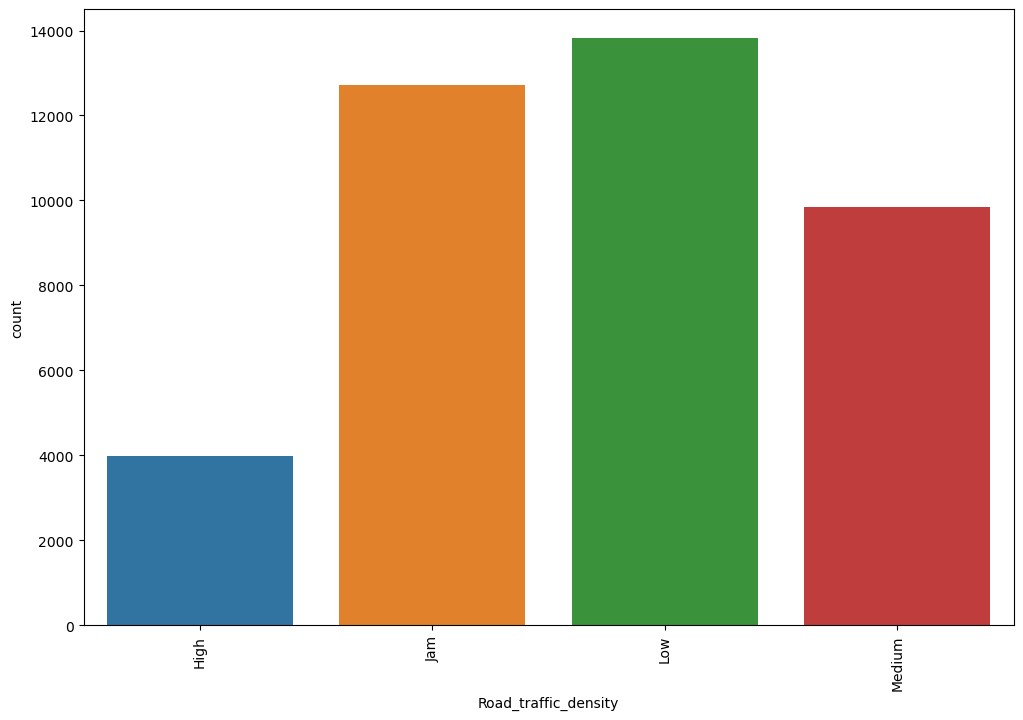

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Delivery_city' column to categorical
df['Road_traffic_density'] = df['Road_traffic_density'].astype('category')

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Road_traffic_density')
plt.xticks(rotation='vertical')
plt.show()


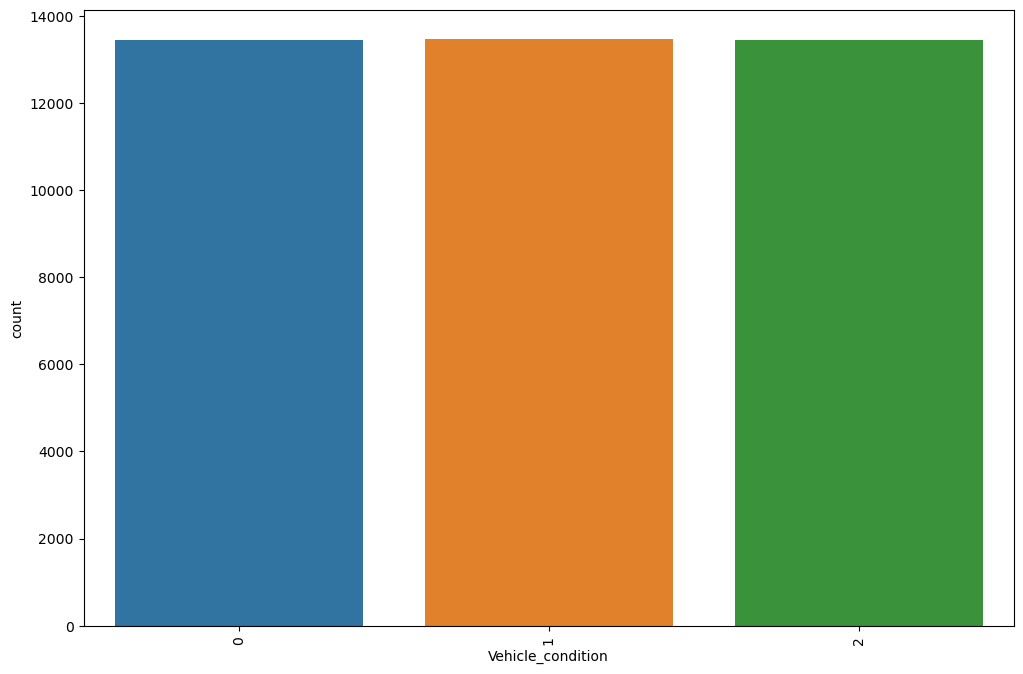

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Delivery_city' column to categorical
df['Vehicle_condition'] = df['Vehicle_condition'].astype('category')

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Vehicle_condition')
plt.xticks(rotation='vertical')
plt.show()
 

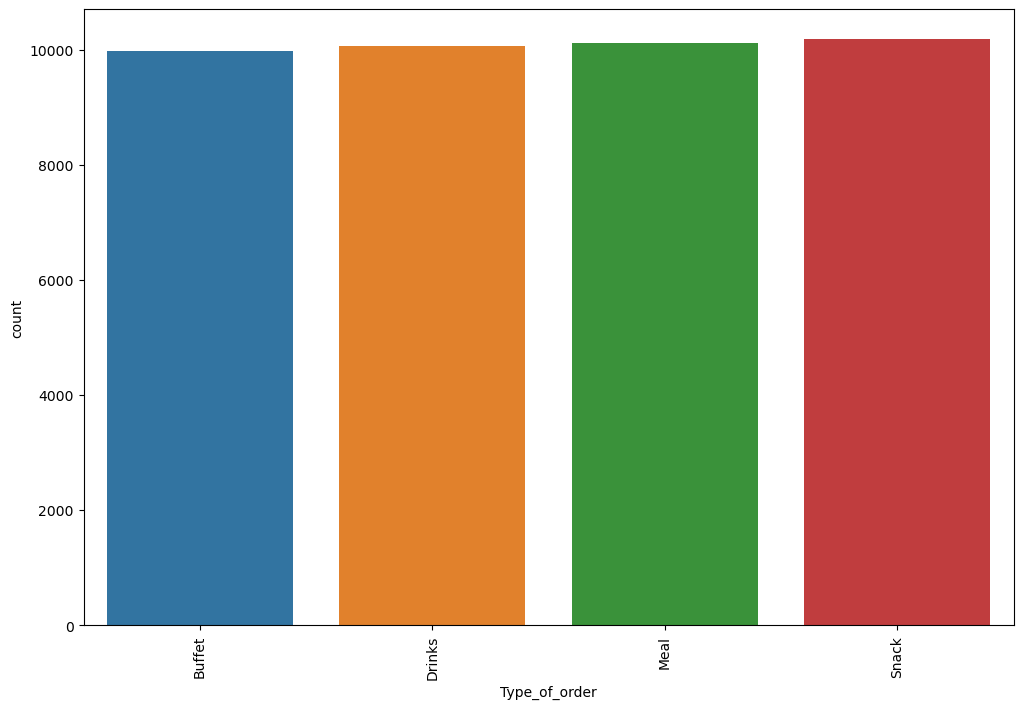

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Delivery_city' column to categorical
df['Type_of_order'] = df['Type_of_order'].astype('category')

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Type_of_order')
plt.xticks(rotation='vertical')
plt.show()
 

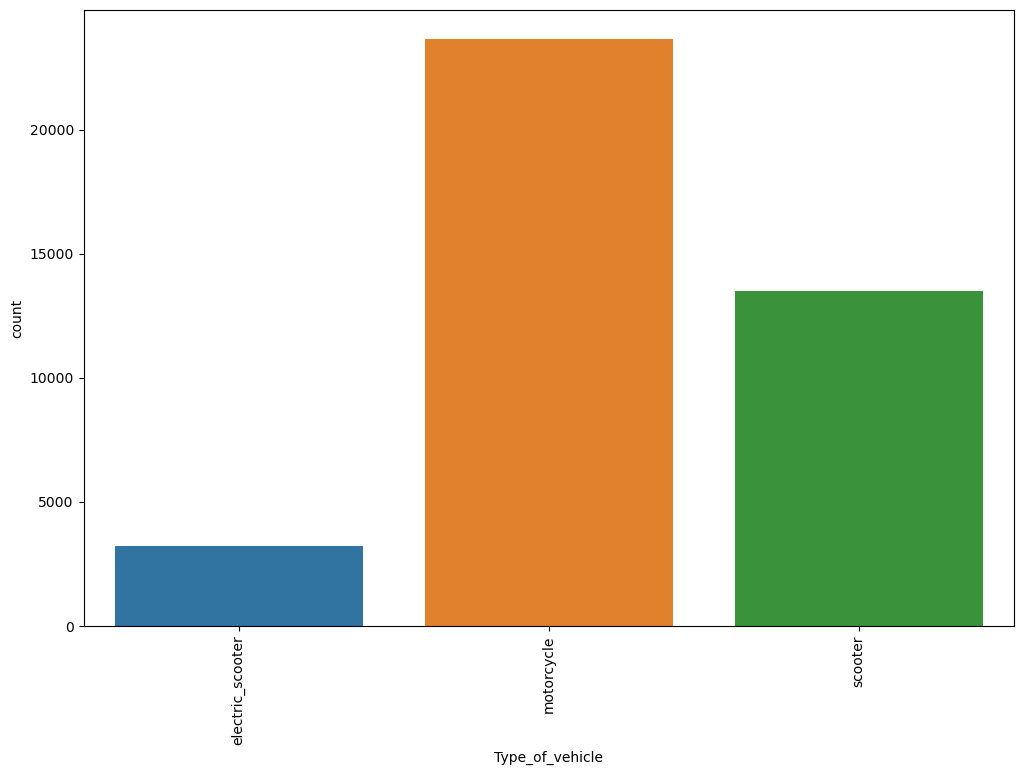

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Delivery_city' column to categorical
df['Type_of_vehicle'] = df['Type_of_vehicle'].astype('category')

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Type_of_vehicle')
plt.xticks(rotation='vertical')
plt.show()
 

In [63]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!= 'O']
numerical_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'Delivery_city',
 'distance']

In [64]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age             200
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             855
Festival                        206
City                           1059
Time_taken (min)                  0
year                              0
month                             0
day                               0
TimeOrder_Hour                    0
TimeOrder_min                     0
Time_Order_picked_Hour            0
Time_Order_picked_min             0
Delivery_city                     0
distance                          0
dtype: int64

In [65]:
df.drop(['Delivery_person_ID', 'Time_Orderd', 'Time_Order_picked'], axis = 1, inplace =True)

In [66]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [67]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,46,2022,12,2,21,55,22,22,DEH,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,23,2022,2,13,14,55,15,15,KOC,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,21,2022,4,3,17,30,17,17,PUNE,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,20,2022,2,13,9,20,9,9,LUDH,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,41,2022,2,14,19,50,20,20,KNP,19.396618


In [68]:
df.dtypes

Delivery_person_Age             float64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Weather_conditions               object
Road_traffic_density           category
Vehicle_condition              category
Type_of_order                  category
Type_of_vehicle                category
multiple_deliveries             float64
Festival                         object
City                             object
Time_taken (min)                  int64
year                              int64
month                             int64
day                               int64
TimeOrder_Hour                    int32
TimeOrder_min                    object
Time_Order_picked_Hour            int32
Time_Order_picked_min             int32
Delivery_city                  category
distance                        float64
dtype: object

In [69]:
print(df.columns)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')


In [70]:
# Convert 'Road_traffic_density' from category to object
df['Road_traffic_density'] = df['Road_traffic_density'].astype('object')

# Convert 'Vehicle_condition' from category to int64
df['Vehicle_condition'] = df['Vehicle_condition'].astype('int64')

# Convert 'Type_of_order' from category to object
df['Type_of_order'] = df['Type_of_order'].astype('object')

# Convert 'Type_of_vehicle' from category to object
df['Type_of_vehicle'] = df['Type_of_vehicle'].astype('object')

# Convert 'TimeOrder_min' from object to int32
df['TimeOrder_min'] = df['TimeOrder_min'].astype('int32')

# Convert 'Delivery_city' from category to object
df['Delivery_city'] = df['Delivery_city'].astype('object')


In [71]:
num_col = [feature for feature in df.columns if df[feature].dtypes!= 'O']
cat_col = [feature for feature in df.columns if df[feature].dtypes== 'O']


In [72]:
num_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [73]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Delivery_city']

In [74]:
df.sample()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
41702,29.0,4.9,12.972793,80.249982,13.002793,80.279982,Cloudy,Jam,0,Snack,...,23,2022,3,15,21,45,21,21,CHEN,4.657649


In [75]:
df.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'year', 'month', 'day', 'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min'], axis = 1, inplace = True)

In [76]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,DEH,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,KOC,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,PUNE,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,KNP,19.396618


In [77]:
X = df.drop(labels = ['Time_taken (min)'], axis = 1)
y = df[['Time_taken (min)']]

In [78]:
df[cat_col].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Delivery_city
0,Fog,Jam,Snack,motorcycle,No,Metropolitian,DEH
1,Stormy,High,Meal,motorcycle,No,Metropolitian,KOC
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian,PUNE
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian,LUDH
4,Fog,Jam,Snack,scooter,No,Metropolitian,KNP


In [79]:
num_col = [feature for feature in df.columns if df[feature].dtypes!= 'O']
df[num_col].head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),TimeOrder_Hour,distance
0,36.0,4.2,2,3.0,46,21,10.280582
1,21.0,4.7,1,1.0,23,14,6.242319
2,23.0,4.7,1,1.0,21,17,13.787860
3,34.0,4.3,0,0.0,20,9,2.930258
4,24.0,4.7,1,1.0,41,19,19.396618


In [80]:
df[df['Road_traffic_density']=='Low']

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
11,31.0,4.7,Sandstorms,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,26,22,RANCHI,19.618739
12,37.0,5.0,Sandstorms,Low,1,Snack,motorcycle,1.0,No,Metropolitian,20,8,COIMB,1.558132
17,35.0,4.3,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,38,23,SUR,13.682045
19,23.0,4.8,Windy,Low,2,Buffet,electric_scooter,0.0,No,Urban,12,23,PUNE,16.853619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,30.0,4.9,Windy,Low,1,Snack,motorcycle,1.0,No,Metropolitian,26,10,COIMB,3.116127
45571,34.0,4.9,Sandstorms,Low,1,Snack,scooter,1.0,No,NaN,26,9,MYS,3.109134
45573,30.0,4.6,Cloudy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,20,0,PUNE,3.064267
45575,37.0,4.8,Sandstorms,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20,9,CHEN,3.104827


In [81]:
Road_traffic_density = ['Low', 'Medium', 'High', 'Jam']
Weather_conditions = ['Sunny', 'Cloudy', 'Windy','Fog', 'Sandstorms', 'Stormy']


In [82]:
categorical_column = ['Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'Delivery_city']
ordinal_encod = ['Road_traffic_density', 'Weather_conditions']
numerical_column = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'multiple_deliveries', 'TimeOrder_Hour', 'distance']

In [83]:
numerical_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value=0)), ('scaler', StandardScaler(with_mean=False))])

categorical_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore')),
                                        ('scaler', StandardScaler(with_mean=False))])

ordinal_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                                    ('ordinal', OrdinalEncoder(categories=[Road_traffic_density, Weather_conditions])),
                                    ('scaler', StandardScaler(with_mean=False))])

In [84]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numerical_column),
    ('categorical_pipeline', categorical_pipeline, categorical_column),
    ('ordinal_pipeline', ordinal_pipeline, ordinal_encod)
])


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [87]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [88]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted)
    MAE = mean_absolute_error(true, predicted)
    MSE = mean_squared_error(true, predicted)
    
    rmse = np.sqrt(mean_squared_error(true, predicted))
    
    return r2, MAE, MSE, rmse


In [89]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "XGBoost": XGBRegressor()
}

r2_list = []
mse_list = []
models_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train, mae_train, mse_train, rmse_train = evaluate_reg(y_train, y_train_pred)
    r2_test, mae_test, mse_test, rmse_test = evaluate_reg(y_test, y_test_pred)
    
    print(f"Model: {model_name}")
    print(f"Train - R-squared: {r2_train:.4f}, MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}")
    print(f"Test - R-squared: {r2_test:.4f}, MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}")
    print("-----------------------")
    
    r2_list.append((r2_train, r2_test))
    mse_list.append((mse_train, mse_test))
    models_list.append(model_name)

Model: Random Forest
Train - R-squared: 0.9760, MAE: 1.1478, MSE: 2.0984, RMSE: 1.4486
Test - R-squared: 0.8284, MAE: 3.1338, MSE: 15.3163, RMSE: 3.9136
-----------------------
Model: Decision Tree
Train - R-squared: 1.0000, MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000
Test - R-squared: 0.6891, MAE: 4.0330, MSE: 27.7467, RMSE: 5.2675
-----------------------
Model: Gradient Boosting
Train - R-squared: 0.7740, MAE: 3.5680, MSE: 19.7730, RMSE: 4.4467
Test - R-squared: 0.7697, MAE: 3.6335, MSE: 20.5584, RMSE: 4.5341
-----------------------
Model: Linear Regression
Train - R-squared: 0.5396, MAE: 5.0352, MSE: 40.2710, RMSE: 6.3459
Test - R-squared: 0.5352, MAE: 5.1301, MSE: 41.4832, RMSE: 6.4407
-----------------------
Model: Ridge
Train - R-squared: 0.5396, MAE: 5.0352, MSE: 40.2714, RMSE: 6.3460
Test - R-squared: 0.5352, MAE: 5.1301, MSE: 41.4830, RMSE: 6.4407
-----------------------
Model: Lasso
Train - R-squared: 0.4689, MAE: 5.4490, MSE: 46.4559, RMSE: 6.8159
Test - R-squared: 0.4645, MAE: 5

In [90]:
import pandas as pd

# ... (previous code)

# Evaluate each model and store the metrics in a list of dictionaries
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train, mae_train, mse_train, rmse_train = evaluate_reg(y_train, y_train_pred)
    r2_test, mae_test, mse_test, rmse_test = evaluate_reg(y_test, y_test_pred)
    
    results.append({
        "Model": model_name,
        "Train R-squared": r2_train,
        "Train MAE": mae_train,
        "Train MSE": mse_train,
        "Train RMSE": rmse_train,
        "Test R-squared": r2_test,
        "Test MAE": mae_test,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the table
print(results_df)


               Model  Train R-squared  Train MAE  Train MSE  Train RMSE  \
0      Random Forest         0.975939   1.146775   2.104687    1.450754   
1      Decision Tree         1.000000   0.000000   0.000000    0.000000   
2  Gradient Boosting         0.773958   3.568043  19.772953    4.446679   
3  Linear Regression         0.539626   5.035159  40.271021    6.345945   
4              Ridge         0.539621   5.035208  40.271419    6.345977   
5              Lasso         0.468921   5.449047  46.455910    6.815857   
6         ElasticNet         0.464164   5.501711  46.872030    6.846315   
7            XGBoost         0.871944   2.676985  11.201599    3.346879   

   Test R-squared  Test MAE   Test MSE  Test RMSE  
0        0.827880  3.135366  15.362864   3.919549  
1        0.690289  4.025158  27.643698   5.257727  
2        0.769655  3.633590  20.559810   4.534293  
3        0.535236  5.130094  41.483215   6.440746  
4        0.535238  5.130114  41.482991   6.440729  
5        0.4